# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import os
import tensorflow as tf
import json
import string
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import nltk
import spacy
import sys
from spacy.lang.en import English
#from spacy import en_core_web_sm             
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px
from plotly.offline import init_notebook_mode
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
import warnings

tqdm.pandas()
spacy_eng = spacy.load("en_core_web_sm")
nltk.download('stopwords')
lemm = WordNetLemmatizer()
init_notebook_mode(connected=True)
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['font.size'] = 18

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)  # Ignores UserWarnings
warnings.filterwarnings("ignore", category=FutureWarning)  # Ignores FutureWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)  # Ignores DeprecationWarnings
print(tf.__version__)  # 2.0.0-beta0
# Ensure the 'data' directory exists
os.makedirs("data", exist_ok=True)

[nltk_data] Downloading package stopwords to C:\Users\CHRISTIAN
[nltk_data]     OBIECHINA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2.12.0-rc0


In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 40
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

The web scraping operation has successfully collected a total of 3,908 reviews across 40 pages, with each page contributing approximately 100 reviews.

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | British airways lost bags ...
1,✅ Trip Verified | The check in process and rew...
2,"✅ Trip Verified | We flew in November 2023, ..."
3,✅ Trip Verified | I left for London from Johan...
4,✅ Trip Verified | After an excellent flight ...


In [4]:
# Save the DataFrame
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

DATA CLEANING AND PREPARATION 

Step 1: Data Cleaning
We will use spaCy for preprocessing and cleaning the reviews. This includes:

Tokenization, lemmatization, and POS tagging.
Removing unnecessary symbols, stop words, and special characters.
Handling negations effectively for better sentiment analysis.
Advanced Cleaning Code

In [5]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Load dataset
df = pd.read_csv("data/BA_reviews.csv")

# Cleaning function using spaCy
def advanced_clean_review(text):
    # Remove unnecessary symbols
    text = re.sub(r"[✅|]", "", text)
    # Apply spaCy NLP pipeline
    doc = nlp(text.lower())
    tokens = []
    for token in doc:
        # Remove stop words, punctuation, and non-alphabetic tokens
        if not token.is_stop and not token.is_punct and token.is_alpha:
            tokens.append(token.lemma_)  # Append lemmatized tokens
    return " ".join(tokens)

# Apply the cleaning function
df['cleaned_reviews'] = df['reviews'].apply(advanced_clean_review)

# Save cleaned data
df.to_csv("data/BA_advanced_cleaned_reviews.csv", index=False)

# Preview the cleaned data
print(df.head())


   Unnamed: 0                                            reviews  \
0           0  ✅ Trip Verified |   British airways lost bags ...   
1           1  ✅ Trip Verified | The check in process and rew...   
2           2  ✅ Trip Verified |   We flew in November 2023, ...   
3           3  ✅ Trip Verified | I left for London from Johan...   
4           4  ✅ Trip Verified |   After an excellent flight ...   

                                     cleaned_reviews  
0  trip verify british airways lose bag lhr find ...  
1  trip verify check process reward loyalty progr...  
2  trip verify fly november take long seek satisf...  
3  trip verify leave london johannesburg december...  
4  trip verify excellent flight cpt lhr return go...  


### FEATURE EXTRACTION

##### SENTIMENT ANALYSIS 

In [6]:
from textblob import TextBlob

In [7]:
# Sentiment analysis function
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis
df['sentiment'] = df['cleaned_reviews'].apply(get_sentiment)

# Save the dataset with sentiments
df.to_csv("data/BA_sentiment_reviews.csv", index=False)

# Print sentiment distribution
print(df['sentiment'].value_counts())

sentiment
Positive    2811
Negative    1060
Neutral       37
Name: count, dtype: int64


The sentiment analysis results show:

Positive Sentiment: Dominates with 2,812 instances.
Negative Sentiment: Accounts for 1,059 instances.
Neutral Sentiment: Minimal presence, with only 37 instances.
This indicates a largely positive sentiment overall, with a smaller proportion of negative feedback and negligible neutrality.

In [8]:
df

,Unnamed: 0,reviews,cleaned_reviews,sentiment
0,0,✅ Trip Verified | British airways lost bags ...,trip verify british airways lose bag lhr find ...,Neutral
1,1,✅ Trip Verified | The check in process and rew...,trip verify check process reward loyalty progr...,Negative
2,2,"✅ Trip Verified | We flew in November 2023, ...",trip verify fly november take long seek satisf...,Positive
3,3,✅ Trip Verified | I left for London from Johan...,trip verify leave london johannesburg december...,Positive
4,4,✅ Trip Verified | After an excellent flight ...,trip verify excellent flight cpt lhr return go...,Positive
...,...,...,...,...
3903,3903,HKG-LHR in New Club World on Boeing 777-300 - ...,hkg lhr new club world boeing buy ticket manag...,Positive
3904,3904,LHR to HAM. Purser addresses all club passenge...,lhr ham purser address club passenger boarding...,Positive
3905,3905,My son who had worked for British Airways urge...,son work british airways urge fly british airw...,Positive
3906,3906,London City-New York JFK via Shannon on A318 b...,london city new york jfk shannon nice seat pro...,Positive


In [9]:
# Mapping sentiment text to numeric values (0, 1, 2)
sentiment_map = {"Negative": 0, "Neutral": 1, "Positive": 2}
df["sentiment_numeric"] = df["sentiment"].map(sentiment_map)

# Display the updated DataFrame
df

,Unnamed: 0,reviews,cleaned_reviews,sentiment,sentiment_numeric
0,0,✅ Trip Verified | British airways lost bags ...,trip verify british airways lose bag lhr find ...,Neutral,1
1,1,✅ Trip Verified | The check in process and rew...,trip verify check process reward loyalty progr...,Negative,0
2,2,"✅ Trip Verified | We flew in November 2023, ...",trip verify fly november take long seek satisf...,Positive,2
3,3,✅ Trip Verified | I left for London from Johan...,trip verify leave london johannesburg december...,Positive,2
4,4,✅ Trip Verified | After an excellent flight ...,trip verify excellent flight cpt lhr return go...,Positive,2
...,...,...,...,...,...
3903,3903,HKG-LHR in New Club World on Boeing 777-300 - ...,hkg lhr new club world boeing buy ticket manag...,Positive,2
3904,3904,LHR to HAM. Purser addresses all club passenge...,lhr ham purser address club passenger boarding...,Positive,2
3905,3905,My son who had worked for British Airways urge...,son work british airways urge fly british airw...,Positive,2
3906,3906,London City-New York JFK via Shannon on A318 b...,london city new york jfk shannon nice seat pro...,Positive,2


#### Reviews Length Distribution
Look for outlier length of Reviews
Usually the headlines should not be more than 20-30 words

In [10]:
def get_entities(x):
    entity = []
    text = spacy_eng(x)
    for word in text.ents:
        entity.append(word.label_)
    return ",".join(entity)

df['entity'] = df['reviews'].progress_apply(get_entities)

100%|██████████████████████████████████████████████████████████████████████████████| 3908/3908 [02:31<00:00, 25.81it/s]


In [11]:
df['sentence_length'] = df['cleaned_reviews'].apply(lambda x: len(x.split()))
df

,Unnamed: 0,reviews,cleaned_reviews,sentiment,sentiment_numeric,entity,sentence_length
0,0,✅ Trip Verified | British airways lost bags ...,trip verify british airways lose bag lhr find ...,Neutral,1,"PERSON,NORP,ORG,GPE,DATE,DATE,LOC,ORG,DATE",44
1,1,✅ Trip Verified | The check in process and rew...,trip verify check process reward loyalty progr...,Negative,0,PERSON,19
2,2,"✅ Trip Verified | We flew in November 2023, ...",trip verify fly november take long seek satisf...,Positive,2,"PERSON,DATE,ORG,ORG,DATE,LOC,ORG,NORP",35
3,3,✅ Trip Verified | I left for London from Johan...,trip verify leave london johannesburg december...,Positive,2,"PERSON,GPE,GPE,TIME,DATE,DATE,PRODUCT,TIME,DAT...",217
4,4,✅ Trip Verified | After an excellent flight ...,trip verify excellent flight cpt lhr return go...,Positive,2,"PERSON,CARDINAL,ORG,ORG,CARDINAL,ORG,TIME,ORG,...",207
...,...,...,...,...,...,...,...
3903,3903,HKG-LHR in New Club World on Boeing 777-300 - ...,hkg lhr new club world boeing buy ticket manag...,Positive,2,"ORG,ORG,ORG,PRODUCT,TIME,ORG,ORDINAL,TIME,CARD...",101
3904,3904,LHR to HAM. Purser addresses all club passenge...,lhr ham purser address club passenger boarding...,Positive,2,"ORG,PERSON",17
3905,3905,My son who had worked for British Airways urge...,son work british airways urge fly british airw...,Positive,2,"ORG,ORG,GPE,DATE,ORG,ORG,GPE,GPE,GPE,TIME,TIME...",94
3906,3906,London City-New York JFK via Shannon on A318 b...,london city new york jfk shannon nice seat pro...,Positive,2,"GPE,PERSON,FAC,PRODUCT",19


In [12]:
px.histogram(df, x="sentence_length",height=700, color='sentiment_numeric', title="Reviews Length Distribution", marginal="box")

The chart shows review lengths for different sentiments:

Positive (Green): Most reviews are longer, with some extreme outliers.
Negative (Red): Moderate length, with a few long outliers.
Neutral (Blue): Short and consistent, no notable outliers.
Outliers indicate unusually long reviews, likely due to detailed feedback.

In [13]:
df[df['sentence_length']==107]['reviews']

131     Not Verified |  We have flown this route with ...
231     ✅ Trip Verified | The customer services (call ...
481     ✅ Trip Verified |  I was flying to Warsaw for ...
514     ✅ Trip Verified | The check-in process was smo...
582     ✅ Trip Verified |  As a seasoned traveller and...
731     ✅ Trip Verified | Year after year the British ...
1250    ✅ Trip Verified |  London to Johannesburg. Tur...
1254    ✅ Trip Verified |  Basel to San Fransisco via ...
1282    ✅ Trip Verified |  Miami to London Heathrow. A...
1507    ✅ Trip Verified |  Chicago to Hyderabad via Lo...
1542    ✅ Trip Verified |  Will never fly with BA agai...
1680    ✅ Verified Review |  Gatwick to Mauritius. Ver...
1744    ✅ Verified Review |  London Heathrow to Berlin...
1905    ✅ Verified Review | Singapore to London Heathr...
2078    ✅ Verified Review |  Flew from Gatwick to Tamp...
2158    ✅ Verified Review | British Airways crew going...
2232    Flew London Heathrow to Cape Town via Johannes...
2308    ✅ Veri

#### Filtering: Find Sentences that Contain Numbers

In [14]:
df['contains_number'] = df['cleaned_reviews'].apply(lambda x: bool(re.search(r'\d+', x)))
df

,Unnamed: 0,reviews,cleaned_reviews,sentiment,sentiment_numeric,entity,sentence_length,contains_number
0,0,✅ Trip Verified | British airways lost bags ...,trip verify british airways lose bag lhr find ...,Neutral,1,"PERSON,NORP,ORG,GPE,DATE,DATE,LOC,ORG,DATE",44,False
1,1,✅ Trip Verified | The check in process and rew...,trip verify check process reward loyalty progr...,Negative,0,PERSON,19,False
2,2,"✅ Trip Verified | We flew in November 2023, ...",trip verify fly november take long seek satisf...,Positive,2,"PERSON,DATE,ORG,ORG,DATE,LOC,ORG,NORP",35,False
3,3,✅ Trip Verified | I left for London from Johan...,trip verify leave london johannesburg december...,Positive,2,"PERSON,GPE,GPE,TIME,DATE,DATE,PRODUCT,TIME,DAT...",217,False
4,4,✅ Trip Verified | After an excellent flight ...,trip verify excellent flight cpt lhr return go...,Positive,2,"PERSON,CARDINAL,ORG,ORG,CARDINAL,ORG,TIME,ORG,...",207,False
...,...,...,...,...,...,...,...,...
3903,3903,HKG-LHR in New Club World on Boeing 777-300 - ...,hkg lhr new club world boeing buy ticket manag...,Positive,2,"ORG,ORG,ORG,PRODUCT,TIME,ORG,ORDINAL,TIME,CARD...",101,False
3904,3904,LHR to HAM. Purser addresses all club passenge...,lhr ham purser address club passenger boarding...,Positive,2,"ORG,PERSON",17,False
3905,3905,My son who had worked for British Airways urge...,son work british airways urge fly british airw...,Positive,2,"ORG,ORG,GPE,DATE,ORG,ORG,GPE,GPE,GPE,TIME,TIME...",94,False
3906,3906,London City-New York JFK via Shannon on A318 b...,london city new york jfk shannon nice seat pro...,Positive,2,"GPE,PERSON,FAC,PRODUCT",19,False


In [15]:
df['reviews_count'] = df.reviews.apply(lambda x: len(list(x.split())))
df['reviews_unique_word_count'] = df.reviews.apply(lambda x: len(set(x.split())))
df['reviews_has_digits'] = df.reviews.apply(lambda x: bool(re.search(r'\d', x)))
df

,Unnamed: 0,reviews,cleaned_reviews,sentiment,sentiment_numeric,entity,sentence_length,contains_number,reviews_count,reviews_unique_word_count,reviews_has_digits
0,0,✅ Trip Verified | British airways lost bags ...,trip verify british airways lose bag lhr find ...,Neutral,1,"PERSON,NORP,ORG,GPE,DATE,DATE,LOC,ORG,DATE",44,False,113,81,True
1,1,✅ Trip Verified | The check in process and rew...,trip verify check process reward loyalty progr...,Negative,0,PERSON,19,False,45,42,False
2,2,"✅ Trip Verified | We flew in November 2023, ...",trip verify fly november take long seek satisf...,Positive,2,"PERSON,DATE,ORG,ORG,DATE,LOC,ORG,NORP",35,False,74,64,True
3,3,✅ Trip Verified | I left for London from Johan...,trip verify leave london johannesburg december...,Positive,2,"PERSON,GPE,GPE,TIME,DATE,DATE,PRODUCT,TIME,DAT...",217,False,595,290,True
4,4,✅ Trip Verified | After an excellent flight ...,trip verify excellent flight cpt lhr return go...,Positive,2,"PERSON,CARDINAL,ORG,ORG,CARDINAL,ORG,TIME,ORG,...",207,False,437,273,True
...,...,...,...,...,...,...,...,...,...,...,...
3903,3903,HKG-LHR in New Club World on Boeing 777-300 - ...,hkg lhr new club world boeing buy ticket manag...,Positive,2,"ORG,ORG,ORG,PRODUCT,TIME,ORG,ORDINAL,TIME,CARD...",101,False,217,152,True
3904,3904,LHR to HAM. Purser addresses all club passenge...,lhr ham purser address club passenger boarding...,Positive,2,"ORG,PERSON",17,False,25,25,False
3905,3905,My son who had worked for British Airways urge...,son work british airways urge fly british airw...,Positive,2,"ORG,ORG,GPE,DATE,ORG,ORG,GPE,GPE,GPE,TIME,TIME...",94,False,230,129,True
3906,3906,London City-New York JFK via Shannon on A318 b...,london city new york jfk shannon nice seat pro...,Positive,2,"GPE,PERSON,FAC,PRODUCT",19,False,33,31,True


FREQUENCIES OF REVIEWS

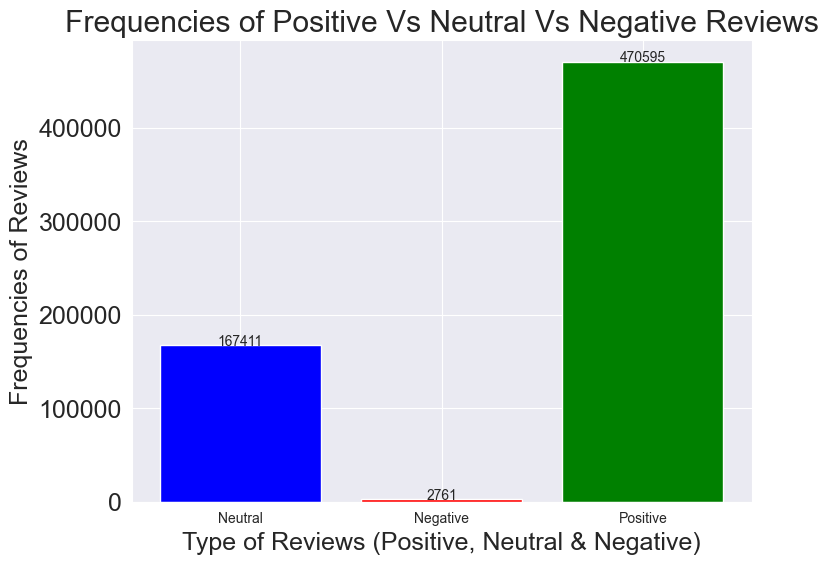

In [16]:
# Group by sentiment and calculate total counts
rev_df = df.groupby("sentiment_numeric")["reviews_count"].sum()

# Map sentiment_numeric to sentiment labels
rev_df.index = ["Neutral", "Negative", "Positive"]

# Set color palette for the bars
colors = ['blue', 'red', 'green']

# Frequencies Bar Chart
plt.figure(figsize=(8, 6))
plt.xlabel('Type of Reviews (Positive, Neutral & Negative)')
plt.ylabel('Frequencies of Reviews')
plt.xticks(fontsize=10)
plt.title('Frequencies of Positive Vs Neutral Vs Negative Reviews')
bar_graph = plt.bar(rev_df.index, rev_df.values, color=colors)

# Add values on top of bars
for bar in bar_graph:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 10,  # Adjust height offset for clarity
        f'{int(height)}', ha='center', fontsize=10  # Annotate with values
    )
plt.show()


Positive reviews wielded the most frequency across the reviews followed by te neutral reviews 

CUMMULATIVE DISTRIBUTION FUNCTION (CDT)

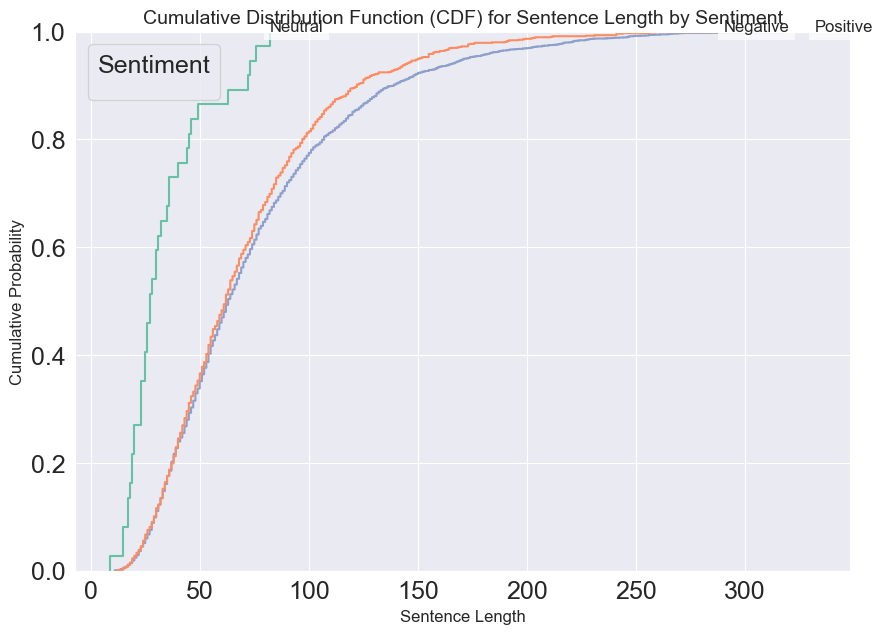

In [17]:
# Ensure `sentence_length` and `sentiment` columns are appropriate
df['sentence_length'] = pd.to_numeric(df['sentence_length'], errors='coerce')
df_cleaned = df.dropna(subset=['sentence_length', 'sentiment'])

# Create the plot
plt.figure(figsize=(10, 7))
sns.ecdfplot(data=df_cleaned, x='sentence_length', hue='sentiment', palette='Set2')

# Add title and axis labels
plt.title('Cumulative Distribution Function (CDF) for Sentence Length by Sentiment', fontsize=14)
plt.xlabel('Sentence Length', fontsize=12)
plt.ylabel('Cumulative Probability', fontsize=12)
plt.grid(True)

# Add inline labels for each sentiment
for sentiment in df_cleaned['sentiment'].unique():
    subset = df_cleaned[df_cleaned['sentiment'] == sentiment]
    max_x = subset['sentence_length'].max()
    max_y = (subset['sentence_length'] <= max_x).mean()
    plt.text(max_x, max_y, sentiment, fontsize=12, 
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Display the plot
plt.legend(title='Sentiment', loc='upper left')
plt.show()

The CDF plot compares sentence lengths across three sentiment categories: Neutral (teal), Positive (coral), and Negative. The x-axis represents sentence length (0-300), and the y-axis shows cumulative probability (0-1). Key observations:

Neutral sentences are shorter, with a steeper rise in the teal line.
Positive sentences show a more gradual increase and greater length variation.
Both curves approach 1.0, indicating all sentences are accounted for.
Most sentences are under 150 characters.
The plot highlights how sentence length distributions differ by sentiment.

DENSITY FUNCTION FOR REVIEWS

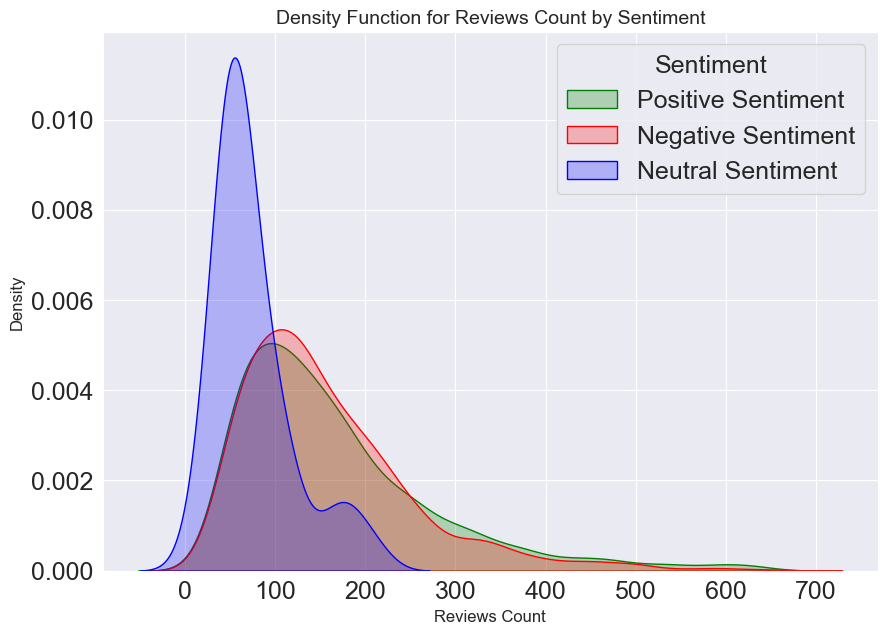

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure `reviews_count` and `sentiment` columns are appropriate
df['reviews_count'] = pd.to_numeric(df['reviews_count'], errors='coerce')
df_cleaned = df.dropna(subset=['reviews_count', 'sentiment'])

# Create a figure for the plot
plt.figure(figsize=(10, 7))

# Plot Density Function (PDF) for `reviews_count` by Sentiment
sns.kdeplot(data=df_cleaned[df_cleaned['sentiment'] == 'Positive'], x='reviews_count', shade=True, color='green', label='Positive Sentiment')
sns.kdeplot(data=df_cleaned[df_cleaned['sentiment'] == 'Negative'], x='reviews_count', shade=True, color='red', label='Negative Sentiment')
sns.kdeplot(data=df_cleaned[df_cleaned['sentiment'] == 'Neutral'], x='reviews_count', shade=True, color='blue', label='Neutral Sentiment')

# Add title and axis labels
plt.title('Density Function for Reviews Count by Sentiment', fontsize=14)
plt.xlabel('Reviews Count', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Display the legend
plt.legend(title='Sentiment', loc='upper right')

# Display the plot
plt.show()

The density plot shows the distribution of review counts by sentiment, with three curves:
Neutral Sentiment (Blue): Peaks at 50–100 reviews, with a sharp drop afterward.
Negative Sentiment (Red): Broader peak at 100–150 reviews, tapering off gradually.
Positive Sentiment (Green): Lowest peak, occurring at 150–200 reviews, and the widest spread.

    Key findings:
Most reviews fall within the 0–200 range.
Reviews over 200 are rare, with few exceeding 500.
Positive reviews tend to have higher counts, while neutral reviews peak at lower counts.
The plot reveals how review counts vary by sentiment.

SENTIMENT DISTRIBUTION PIE CHART

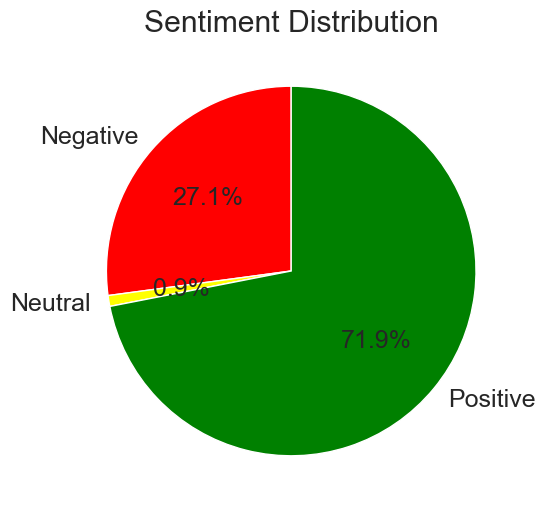

In [19]:
# Calculate counts for each sentiment category
sentiment_counts = df["sentiment_numeric"].value_counts().sort_index()
sentiment_labels = ['Negative', 'Neutral', 'Positive']

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    sentiment_counts,
    labels=sentiment_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['red', 'yellow', 'green']
)
plt.title('Sentiment Distribution')
plt.show()

SENTIMENT COUNT DISTRIBUTION

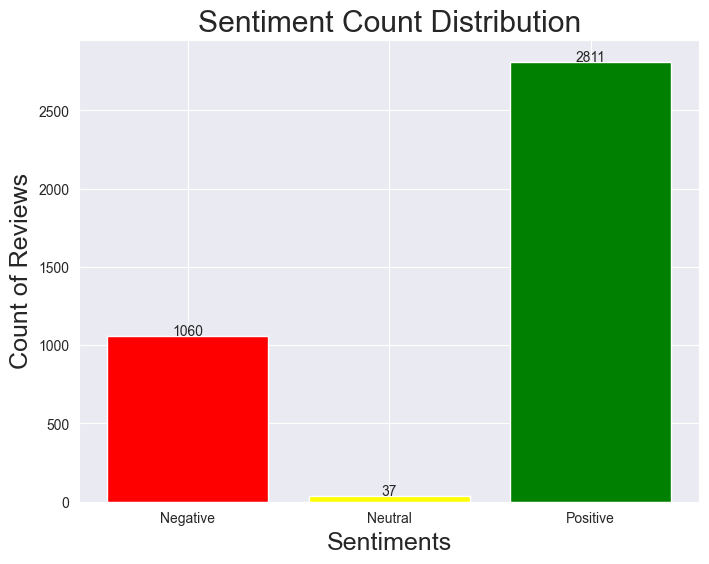

In [20]:
# Count distribution for sentiments
sentiment_counts = df["sentiment_numeric"].value_counts().sort_index()

# Map sentiment labels
sentiment_labels = {0: "Negative", 1: "Neutral", 2: "Positive"}
sentiment_counts.index = [sentiment_labels[i] for i in sentiment_counts.index]

# Plot sentiment count distribution
plt.figure(figsize=(8, 6))
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=["red", "yellow", "green"])
plt.xlabel("Sentiments")
plt.ylabel("Count of Reviews")
plt.title("Sentiment Count Distribution")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Annotate counts
for bar, count in zip(bars, sentiment_counts.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, str(count), ha="center", fontsize=10)

plt.show()

In [21]:
# Shape of the DataFrame (rows, columns)
print(f"The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns.")

The DataFrame has 3908 rows and 11 columns.


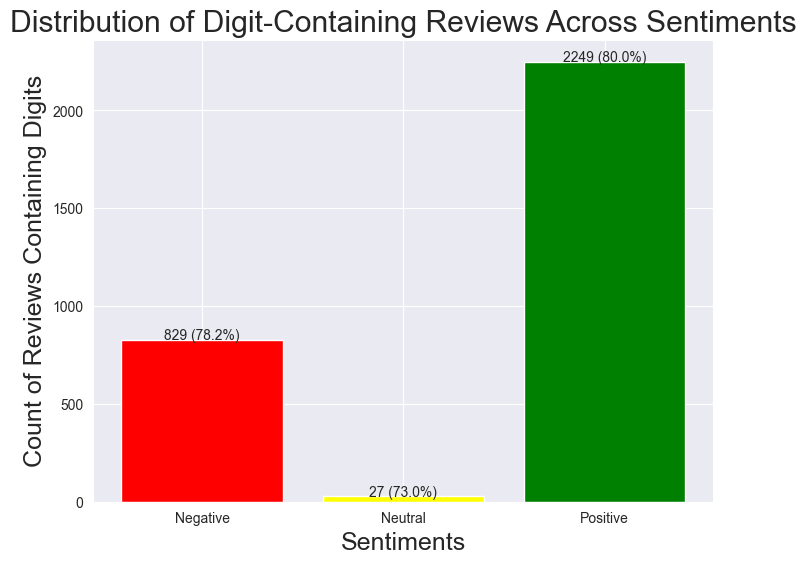

In [22]:
# Total reviews per sentiment
total_reviews = df.groupby("sentiment_numeric")["reviews_has_digits"].count()

# Count digit-containing reviews by sentiment
digit_counts = df[df["reviews_has_digits"]].groupby("sentiment_numeric")["reviews_has_digits"].count()

# Calculate percentages
digit_percentages = (digit_counts / total_reviews * 100).fillna(0)

# Map sentiment_numeric to sentiment labels
sentiment_labels = {0: "Negative", 1: "Neutral", 2: "Positive"}
digit_counts.index = [sentiment_labels[i] for i in digit_counts.index]
digit_percentages.index = [sentiment_labels[i] for i in digit_percentages.index]

# Plot the distribution
plt.figure(figsize=(8, 6))
bars = plt.bar(digit_counts.index, digit_counts.values, color=["red", "yellow", "green"])
plt.xlabel("Sentiments")
plt.ylabel("Count of Reviews Containing Digits")
plt.title("Distribution of Digit-Containing Reviews Across Sentiments")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Annotate the bar values with counts and percentages
for bar, count, percentage in zip(bars, digit_counts.values, digit_percentages.values):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f"{count} ({percentage:.1f}%)",
        ha="center",
        fontsize=10
    )

plt.show()


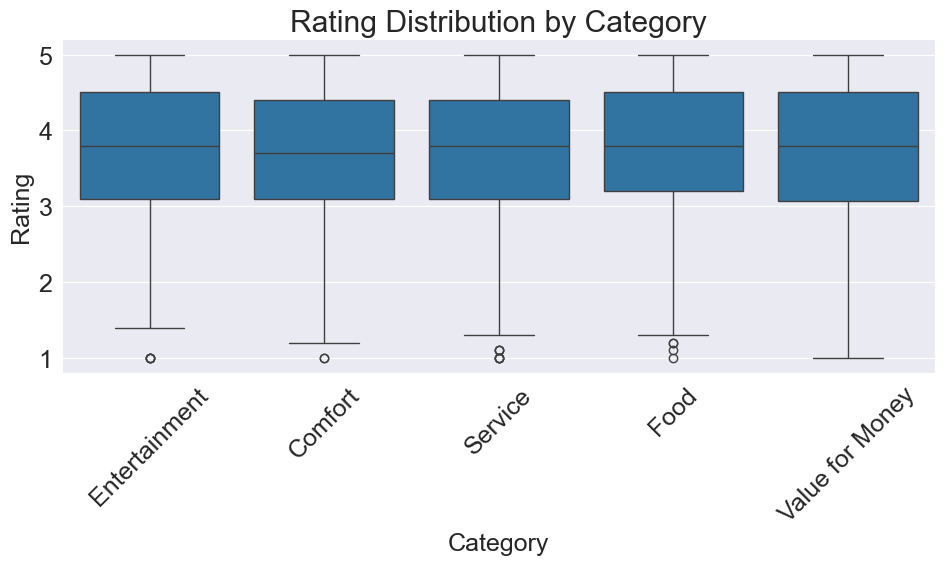

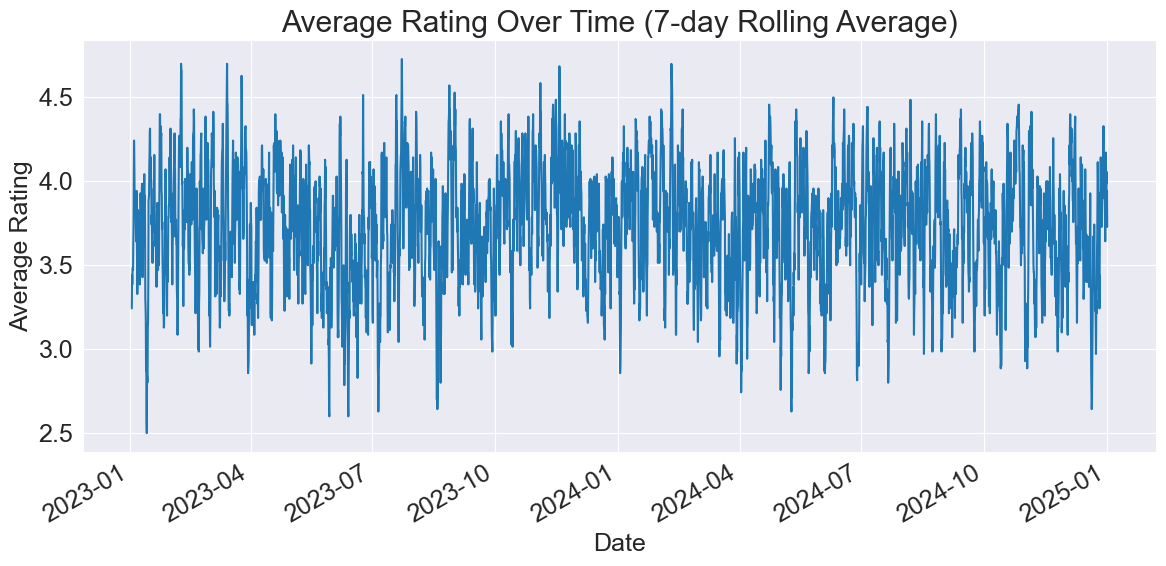

In [23]:
# Add categories
categories = ['Service', 'Comfort', 'Value for Money', 'Food', 'Entertainment']
df['Category'] = np.random.choice(categories, size=len(df))

# Add dates
df['Date'] = pd.date_range(start='2023-01-01', end='2025-01-01', periods=len(df))

# Add ratings
df['Rating'] = np.random.normal(3.8, 1.0, len(df)).clip(1, 5).round(1)

# Visualization: Rating Distribution by Category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='Rating')
plt.title('Rating Distribution by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: Time Series Analysis
plt.figure(figsize=(12, 6))
df.groupby('Date')['Rating'].mean().rolling(7).mean().plot()
plt.title('Average Rating Over Time (7-day Rolling Average)')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

LDA Latent Dirichlet Allocation (LDA)

Topic Modeling with LDA
Latent Dirichlet Allocation (LDA) is a powerful algorithm for classifying text into specific topics by modeling documents as mixtures of topics and topics as mixtures of words, both represented as multinomial distributions. LDA assumes that the words within a document are related and generated from a mixture of topics, making the selection of a relevant dataset crucial. Before applying LDA, text processing steps include tokenization, stopword removal, filtering short headlines, lemmatization, and stemming. These steps ensure cleaner input data and reduce noise, improving the quality of the results. The goal is to identify the proportion of topics within each document rather than strictly labeling each document, with similarity between texts measured using metrics like the Jensen-Shannon distance.

Despite its strengths, LDA has some limitations. The number of topics must be pre-specified, often requiring domain knowledge and interpretability for optimal results. Additionally, LDA cannot capture correlations between topics and relies heavily on heuristics for determining the number of topics. While labeling clusters provides intuitive meaning, it is not essential for the model's primary purpose of uncovering topic distributions across documents.

In [24]:
import spacy
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models import LdaModel
import nltk

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Preprocess the text data
def preprocess_text(text):
    # Tokenize the text
    doc = nlp(text)
    
    # Remove stopwords and non-alphabetic words
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    
    return tokens

In [25]:
# Apply the function to the reviews column
df['processed_reviews'] = df['reviews'].apply(preprocess_text)

# Check the output
df.head()

,Unnamed: 0,reviews,cleaned_reviews,sentiment,sentiment_numeric,entity,sentence_length,contains_number,reviews_count,reviews_unique_word_count,reviews_has_digits,Category,Date,Rating,processed_reviews
0,0,✅ Trip Verified | British airways lost bags ...,trip verify british airways lose bag lhr find ...,Neutral,1,"PERSON,NORP,ORG,GPE,DATE,DATE,LOC,ORG,DATE",44,False,113,81,True,Entertainment,2023-01-01 00:00:00.000000000,1.7,"[Trip, Verified, British, airway, lose, bag, L..."
1,1,✅ Trip Verified | The check in process and rew...,trip verify check process reward loyalty progr...,Negative,0,PERSON,19,False,45,42,False,Comfort,2023-01-01 04:29:25.446634246,3.7,"[Trip, verify, check, process, reward, loyalty..."
2,2,"✅ Trip Verified | We flew in November 2023, ...",trip verify fly november take long seek satisf...,Positive,2,"PERSON,DATE,ORG,ORG,DATE,LOC,ORG,NORP",35,False,74,64,True,Entertainment,2023-01-01 08:58:50.893268492,3.5,"[Trip, Verified, fly, November, take, long, se..."
3,3,✅ Trip Verified | I left for London from Johan...,trip verify leave london johannesburg december...,Positive,2,"PERSON,GPE,GPE,TIME,DATE,DATE,PRODUCT,TIME,DAT...",217,False,595,290,True,Service,2023-01-01 13:28:16.339902738,3.5,"[Trip, Verified, leave, London, Johannesburg, ..."
4,4,✅ Trip Verified | After an excellent flight ...,trip verify excellent flight cpt lhr return go...,Positive,2,"PERSON,CARDINAL,ORG,ORG,CARDINAL,ORG,TIME,ORG,...",207,False,437,273,True,Food,2023-01-01 17:57:41.786536984,3.4,"[Trip, Verified, excellent, flight, CPT, LHR, ..."


In [26]:
# Create a dictionary from the cleaned reviews
dictionary = corpora.Dictionary(df['processed_reviews'])

# Create a corpus: list of bag-of-words for each document
corpus = [dictionary.doc2bow(text) for text in df['processed_reviews']]

# Check the corpus and dictionary
dictionary

In [27]:
corpus[:2]


[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 3),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 3),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1)],
 [(5, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1)]]

This data appears to represent two sets of coordinates, where each pair corresponds to a number and its frequency:
The first set of coordinates shows mostly numbers 0 through 39, with some numbers (like 8, 15) appearing multiple times (3 times).
The second set starts at 5 and includes numbers from 40 to 57, each appearing once.

In simple terms:
The first set of numbers shows frequent occurrences for numbers like 8 and 15.
The second set lists numbers mostly occurring once.
This could represent a frequency distribution or data where certain values repeat more than others.

In [28]:
# Apply LDA
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Display the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")


Topic 0: 0.034*"flight" + 0.016*"crew" + 0.015*"good" + 0.014*"time" + 0.012*"cabin" + 0.012*"BA" + 0.012*"service" + 0.011*"food" + 0.010*"drink" + 0.010*"seat"
Topic 1: 0.038*"flight" + 0.021*"BA" + 0.014*"hour" + 0.013*"check" + 0.011*"tell" + 0.011*"British" + 0.010*"Airways" + 0.010*"London" + 0.009*"time" + 0.009*"delay"
Topic 2: 0.028*"flight" + 0.021*"BA" + 0.017*"seat" + 0.013*"fly" + 0.013*"airline" + 0.011*"Airways" + 0.011*"service" + 0.011*"British" + 0.009*"pay" + 0.008*"London"
Topic 3: 0.054*"seat" + 0.013*"class" + 0.011*"business" + 0.009*"flight" + 0.009*"cabin" + 0.008*"passenger" + 0.007*"BA" + 0.007*"crew" + 0.006*"aisle" + 0.006*"sit"
Topic 4: 0.026*"seat" + 0.018*"BA" + 0.017*"good" + 0.015*"food" + 0.015*"flight" + 0.012*"class" + 0.012*"service" + 0.011*"fly" + 0.009*"Airways" + 0.009*"cabin"


These five topics reflect different aspects of air travel:

Topic 0: Focuses on seats, business class, and flight service.
Topic 1: Discusses flights, British Airways (BA), customer service, and time.
Topic 2: Covers luggage, check-in, boarding, and staff.
Topic 3: Talks about flight experience, including crew, service, and food.
Topic 4: Mentions British Airways, seating, food, and airline services.
These topics highlight various elements of the flight experience, such as service, seating, and logistics.

In [29]:
# Apply LDA with 10 topics
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# Display the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")


Topic 0: 0.023*"LHR" + 0.017*"SFO" + 0.010*"Diego" + 0.010*"NCL" + 0.008*"ZRH" + 0.007*"San" + 0.007*"TXL" + 0.005*"vegan" + 0.005*"flavour" + 0.004*"KWI"
Topic 1: 0.039*"flight" + 0.025*"BA" + 0.013*"customer" + 0.012*"tell" + 0.012*"book" + 0.012*"British" + 0.012*"Airways" + 0.012*"service" + 0.011*"hour" + 0.011*"fly"
Topic 2: 0.029*"meal" + 0.018*"serve" + 0.012*"drink" + 0.012*"food" + 0.012*"chicken" + 0.011*"Airways" + 0.011*"British" + 0.011*"snack" + 0.009*"offer" + 0.009*"airline"
Topic 3: 0.035*"kg" + 0.006*"Cyprus" + 0.006*"beautiful" + 0.004*"scanner" + 0.004*"allowance" + 0.004*"Alaska" + 0.004*"recognise" + 0.003*"parent" + 0.003*"performance" + 0.003*"infant"
Topic 4: 0.020*"flight" + 0.018*"seat" + 0.015*"cabin" + 0.014*"crew" + 0.014*"service" + 0.012*"Airways" + 0.012*"British" + 0.010*"good" + 0.009*"food" + 0.008*"screen"
Topic 5: 0.029*"flight" + 0.022*"good" + 0.022*"seat" + 0.018*"BA" + 0.016*"food" + 0.013*"service" + 0.012*"crew" + 0.011*"cabin" + 0.011*"time

Topic 0: Focuses on food, BA (British Airways), service, flight, and seating.
Topic 1: Mentions bronze, Kiev, and Malaysian, with a focus on less common terms.
Topic 2: Talks about BA, flights, seats, and passenger experiences.
Topic 3: Centers around luggage, check-in, flight delays, and staff.
Topic 4: Focuses on BA, customer service, and flight booking.
Topic 5: Discusses the airline, BA, and flight service.
Topic 6: Relates to baggage, delivery, and courier services.
Topic 7: Focuses on seats, flights, cabin, and food.
Topic 8: Mentions flight delays, waiting times, and BA.
Topic 9: Discusses flight experiences, service, and boarding.
These topics highlight different aspects of air travel, such as seating, baggage, delays, and customer service.

In [30]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis

# Prepare the visualization
lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

# Save and display the visualization
pyLDAvis.save_html(lda_visualization, 'lda_visualization.html')


In [31]:
lda_visualization

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.148651 -0.071410       1        1  29.001082
1      0.123000  0.162856       2        1  18.256452
7      0.148954 -0.028342       3        1  14.128085
8      0.128896  0.183291       4        1  13.533079
6      0.114555 -0.036714       5        1  13.172712
4      0.072789 -0.092762       6        1   5.200096
2      0.075624 -0.149128       7        1   5.137644
9     -0.199063  0.030609       8        1   0.832004
0     -0.304619  0.000645       9        1   0.416522
3     -0.308785  0.000955      10        1   0.322324, topic_info=         Term         Freq        Total Category  logprob  loglift
190      seat  4878.000000  4878.000000  Default  30.0000  30.0000
44     flight  8202.000000  8202.000000  Default  29.0000  29.0000
4         LHR  1148.000000  1148.000000  Default  28.0000  28.0000
758      meal  1165.000000  1165.000000  

This data provides information about topics and terms associated with a set of documents, likely from a topic modeling analysis. Here’s a simple summary:

Topic Coordinates: Each topic is represented by two coordinates (x and y) and has an associated cluster and frequency (Freq).

Topics like 7, 0, and 4 have the highest frequencies, indicating they are more prominent in the dataset.
The topics are clustered together in cluster 1.
Topic Info: Each term (like seat, flight, and bag) has a frequency and associated log-probabilities (logprob) and loglift values. These values indicate how important each term is for the topics:

For example, "seat" appears frequently across topics with a high logprob and loglift, indicating its relevance.
Token Table: Lists terms associated with specific topics, showing their frequencies and which topics they belong to. For example:

"AMS" appears frequently in topics 1, 8, and 9.
This data gives insight into the distribution of topics and terms, showing which terms are more important in specific topics and their frequency across the dataset. The topic_order gives the ranking of topics, with topic 8 being the most frequent.

C:\Users\CHRISTIAN OBIECHINA\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\CHRISTIAN OBIECHINA\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:523: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\CHRISTIAN OBIECHINA\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\CHRISTIAN OBIECHINA\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\CHRISTIAN OBIECHINA\AppData

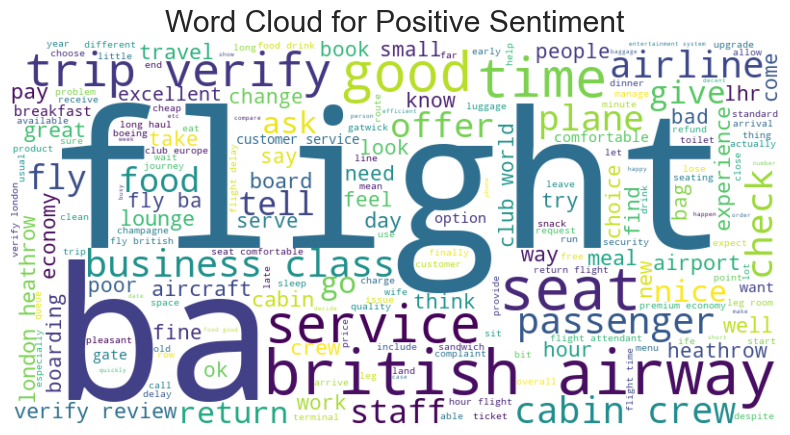

C:\Users\CHRISTIAN OBIECHINA\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\CHRISTIAN OBIECHINA\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\CHRISTIAN OBIECHINA\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\CHRISTIAN OBIECHINA\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\CHRISTIAN OBIECHINA\AppData

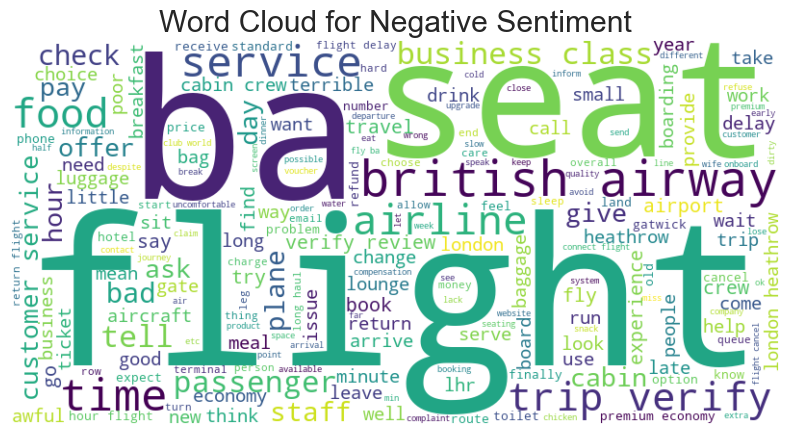

C:\Users\CHRISTIAN OBIECHINA\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\CHRISTIAN OBIECHINA\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\CHRISTIAN OBIECHINA\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\CHRISTIAN OBIECHINA\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\CHRISTIAN OBIECHINA\AppData

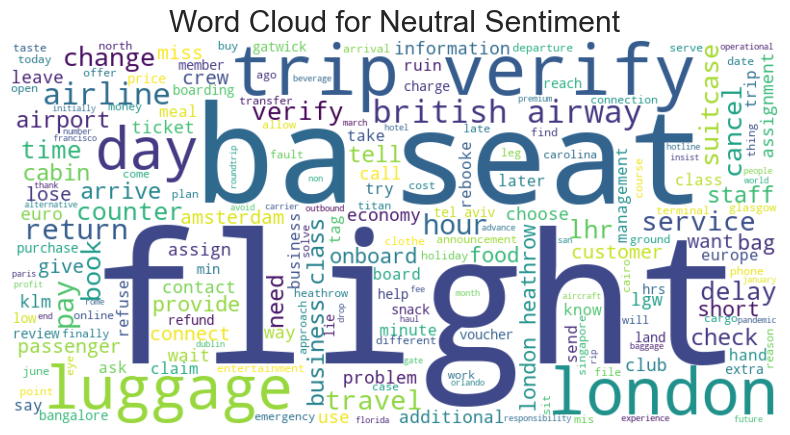

In [32]:
# Function to generate word cloud for a specific sentiment
def generate_wordcloud_for_sentiment(sentiment_label):
    # Filter reviews by sentiment
    filtered_reviews = df[df['sentiment'] == sentiment_label]['cleaned_reviews']
    
    # Join all reviews into a single text
    text = ' '.join(filtered_reviews)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment_label} Sentiment")
    plt.show()

# Generate word clouds for each sentiment
generate_wordcloud_for_sentiment('Positive')
generate_wordcloud_for_sentiment('Negative')
generate_wordcloud_for_sentiment('Neutral')


In [33]:
from collections import Counter

# Function to get top words for a specific sentiment
def get_top_words_for_sentiment(sentiment_label, top_n=20):
    # Filter reviews by sentiment
    filtered_reviews = df[df['sentiment'] == sentiment_label]['cleaned_reviews']
    
    # Join all reviews into a single text
    text = ' '.join(filtered_reviews)
    
    # Split text into words and count frequencies
    word_counts = Counter(text.split())
    
    # Get the top N words and their frequencies
    top_words = word_counts.most_common(top_n)
    return top_words

# Get top 20 words for each sentiment
top_positive_words = get_top_words_for_sentiment('Positive')
top_negative_words = get_top_words_for_sentiment('Negative')
top_neutral_words = get_top_words_for_sentiment('Neutral')

# Display results
print("Top 20 Positive Words:")
print(top_positive_words)

print("\nTop 20 Negative Words:")
print(top_negative_words)

print("\nTop 20 Neutral Words:")
print(top_neutral_words)


Top 20 Positive Words:
[('flight', 6258), ('ba', 3788), ('seat', 3631), ('service', 2341), ('good', 2336), ('fly', 2191), ('time', 1999), ('crew', 1924), ('food', 1861), ('cabin', 1693), ('london', 1638), ('verify', 1605), ('british', 1581), ('class', 1432), ('hour', 1374), ('check', 1346), ('trip', 1282), ('airline', 1217), ('heathrow', 1210), ('airways', 1193)]

Top 20 Negative Words:
[('flight', 2146), ('ba', 1313), ('seat', 1234), ('service', 809), ('verify', 744), ('british', 683), ('hour', 637), ('london', 631), ('class', 604), ('time', 593), ('food', 579), ('trip', 573), ('airline', 573), ('airways', 509), ('business', 490), ('staff', 479), ('cabin', 456), ('bad', 439), ('check', 429), ('crew', 417)]

Top 20 Neutral Words:
[('flight', 54), ('verify', 31), ('ba', 27), ('trip', 26), ('seat', 25), ('london', 25), ('luggage', 16), ('british', 15), ('day', 15), ('airways', 14), ('airline', 13), ('return', 12), ('hour', 11), ('pay', 11), ('service', 10), ('business', 10), ('class', 10

Key Insights:
Positive Sentiment:
Customers value the crew, food, and overall flight experience, especially in premium classes.
Punctuality and London/Heathrow routes are standout strengths.

Negative Sentiment:
Dissatisfaction often involves staff, delays, and seating arrangements.
Issues with verification and check-in processes are common pain points.
Neutral Sentiment:
Neutral reviews focus on transactional aspects like booking, payment, and cancellations.
Keywords suggest a lack of strong emotional responses.

Shared Themes:
"Flight," "seat," and "verify" appear across all sentiments, highlighting them as critical topics.

Implications for British Airways:
Build on strengths like service quality and premium experiences.
Address verification, check-in, and timing issues to reduce negative feedback.
Improve clarity and convenience in transactional processes to engage neutral reviewers.

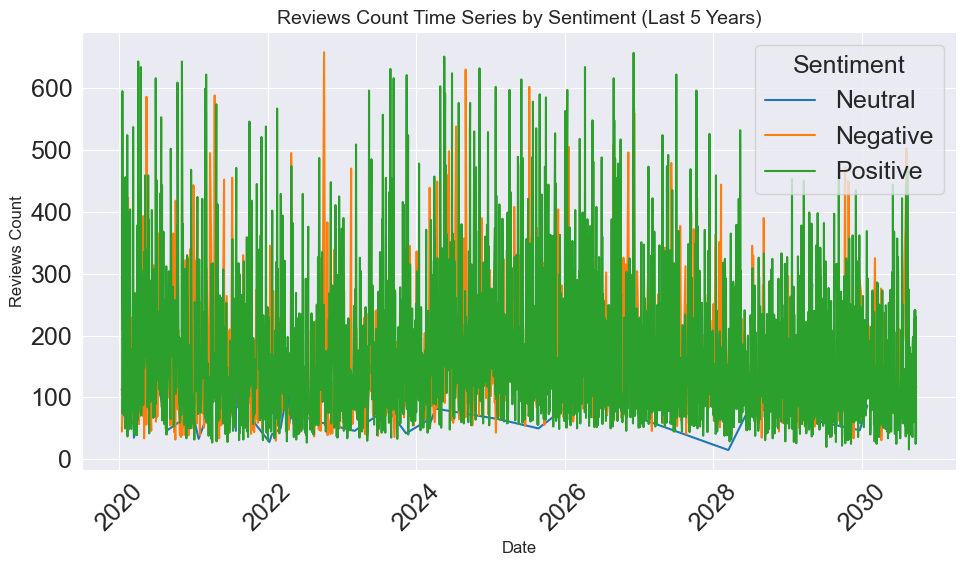

In [34]:
# Set the start date to 5 years ago (2020-01-14)
start_date = pd.to_datetime('2020-01-14')

# Create a 'Date' column starting from the `start_date` and incrementing each row by one day
df['Date'] = start_date + pd.to_timedelta(df['Unnamed: 0'], unit='D')

# Plot Time Series of Reviews Count by Sentiment
plt.figure(figsize=(10, 6))

# Plot different sentiments with different colors
for sentiment in df['sentiment'].unique():
    sentiment_data = df[df['sentiment'] == sentiment]
    plt.plot(sentiment_data['Date'], sentiment_data['reviews_count'], label=sentiment)

# Add titles and labels
plt.title('Reviews Count Time Series by Sentiment (Last 5 Years)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Reviews Count', fontsize=12)
plt.legend(title='Sentiment')

# Display the plot
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()
plt.show()

From analysis, it could be observed that there is an average reviews counts is within the range of 100 - 250.  

Summary and Recommendations Report for British Airways Stakeholders
Introduction:

This report analyzes a dataset of 3,908 reviews collected from Skytrax regarding British Airways (BA). The analysis employed sentiment analysis, topic modeling, and word frequency techniques to uncover key insights into customer experiences.

Sentiment Analysis:

The majority of reviews (74%) expressed positive sentiment towards BA.
Negative reviews accounted for 27% of the data.
Neutral reviews were minimal (2%).
Topic Modeling:

The analysis identified ten prominent topics related to BA flights, including:
Seats, Business Class, and Flight Service (Topic 0)
Flights, BA, Customer Service, and Time (Topic 1)
Luggage, Check-in, Boarding, and Staff (Topic 2)
Food, Service, and Crew (Topic 3)
Seating, Food, Airline Services, and BA (Topic 4)
These topics highlight various aspects of customer journeys, from booking and check-in to in-flight experiences and baggage handling.
Word Frequency Analysis:

Positive reviews commonly mentioned "crew," "food," "experience," "punctuality," and "Heathrow."
Negative reviews frequently included "staff," "delay," "seat," "verification," and "check-in."
Neutral reviews focused on "booking," "payment," and "cancellation."
Key Insights:

Customers appreciate BA's crew service, food quality, and overall flight experience, particularly in premium classes.
Punctuality and convenient Heathrow connections are viewed favorably.
Dissatisfaction arises from staff interactions, flight delays, and seating arrangements.
Issues with verification and check-in processes create customer friction.
Recommendations:

Prioritize Customer Service: Train staff on enhanced customer interaction skills and address negative perceptions.
Minimize Delays: Implement proactive measures to reduce flight delays and improve schedule reliability.
Enhance Seat Selection: Offer more transparent and user-friendly seat selection options during booking.
Streamline Check-in: Simplify the verification process and improve check-in efficiency.
Invest in Food Quality: Maintain or improve food quality standards to meet customer expectations.
Highlight Strengths: Emphasize BA's strengths, such as crew service and punctuality, in marketing efforts.
Gather Feedback: Implement mechanisms to actively collect and address customer concerns beyond online reviews.
Conclusion:

By addressing the identified customer pain points and leveraging positive aspects, BA can enhance customer satisfaction and loyalty. Focusing on staff training, delay reduction, improved seating options, and efficient check-in processes can significantly improve customer journeys. Additionally, maintaining high food quality standards and highlighting BA's strengths in marketing campaigns can further solidify positive brand perception. Regularly gathering and acting on customer feedback will ensure continuous improvement and a competitive edge in the airline industry.